# **NYC TLC TRIP RECORD**

# **Business Understanding**

## Latar Belakang
New York City merupakan salah satu kota terpadat di dunia dimana kota ini memiliki penduduk sekitar 8,26 juta jiwa pada tahun 2023.
<br><br>
Untuk memenuhi kebutuhan masyarakat dalam moda transportasi antar wilayah, pemerintah New York membuat sebuah agensi armada taxi bernama NYC Taxi & Limousine Commission (TLC). NYC TLC sendiri memiliki dua tipe armada yang utama, yaitu Yellow Taxi dan Green Taxi.
<br><br>
Seluruh riwayat perjalanan taxi telah disimpan pada database perusahaan. Untuk meningkatkan jumlah konsumen, perusahaan ingin mengamati perilaku pengguna dari taxi, khususnya Green Taxi. Dari pengamatan tersebut, diharapkan mampu membantu perusahaan dalam menentukan strategi bisnis yang akan dilakukan.

## Pernyataan Masalah
Perusahaan ingin mengetahui perilaku pengguna Green Taxi yang pernah melakukan perjalanan. Informasi tersebut akan membantu perusahaan untuk menentukan strategi bisnis dalam upaya peningkatan jumlah konsumen Green Taxi.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:
- Bagaimana perilaku konsumen Green Taxi apabila dilihat dari distribusi perjalanan setiap minggunya, lokasi penjemputan dan penurunan, jenis pembayaran dan lain sebagainya.

## Batasan Masalah

Pada analisa ini, data yang akan digunakan merupakan data pada bulan Januari tahun 2023 yang didapatkan dari laman [berikut.](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

## Tujuan
Tujuan dari analisa ini adalah memberikan insights kepada perusahaan yang dapat membantu dalam pengambilan keputusan dalam meningkatkan penggunaan dari Green Taxi.

# Library

Library yang diperlukan ditampilkan dibawah ini.

In [461]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Data

Berikut merupakan informasi terkait dataset:


| Feature                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|`VendorID`              | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |
| `lpep_pickup_datetime`                          | Tanggal dan waktu ketika argo mulai berjalan.                                                                                                             |
| `lpep_dropoff_datetime`                          | Tanggal dan waktu ketika argo dimatikan.                                                                                                             |
| `Passenger_count`                          | Jumlah penumpang dalam kendaraan. Nilai ini diinput oleh driver.                                                                                                             |
| `Trip_distance`                          | Jarak perjalanan (dalam miles) yang tercatat pada argometer.                                                                                                             |
| `PULocationID`                          | Zona Taxi TLC ketika argometer mulai berjalan. (Pick Up)                                                                                                             |
| `DOLocationID`                          | Zona Taxi TLC ketika argometer dimatikan. (Drop Off)                                                                                                           |
| `RateCodeID`                          | Kode tarif untuk setiap perjalanan.                                                                                                           |
|                           | 1 = Standard rate (Tarif standar)                                                                                        |
|                           | 2 = JFK                                                                                                             |
|                           | 3 = Newark                                                                                         |
|                           | 4 = Nassau or Westchester                                                                                                             |
|                           | 5 = Negotiated fare (Tarif hasil negoisasi)                                                                                         |
|                           | 6 = Group ride (Perjalanan secara berkelompok)                                                                                                             |
| `Store_and_fwd_flag`                          | Menampilkan catatan perjalanan yang disimpan dalam memori kendaraan sebelum dikirim kepada vendor.                                                                                                                          |
|                           | Y = store and forward trip (Perjalanan yang disimpan dan lanjutkan)                                                                                        |
|                           | N = not a store and forward trip (Bukan merupakan perjalanan yang disimpan dan lanjutkan)                                                                                                             |
| `Payment_type`                          | Kode pembayaran yang dibayarkan oleh penumpang.                                                                                                           |
|                           | 1 = Credit card (Pembayaran menggunakan kartu kredit)                                                                                        |
|                           | 2 = Cash (Pembayaran tunai)                                                                                                             |
|                           | 3 = No charge (Tidak dikenakan biaya dikarenakan adanya kesalahan baik pada driver atau sistem)                                                                                         |
|                           | 4 = Dispute (Penumpang mengajukan banding terkait tarif perjalanan yang tidak sesuai)                                                                                                             |
|                           | 5 = Unknown (Pembayaran menggunakan metode lain atau cashless seperti PayPal, Wise, dsb)                                                                                         |
|                           | 6 = Voided trip (Pembatalan perjalanan)                                                                                                             |
| `Fare_amount`                          | Tarif waktu dan jarak perjalanan dihitung berdasarkan argometer. Biaya lain-lain dan tambahan mencakup biaya pada jam-jam sibuk dan melebihi semalaman sebesar USD 0.50 dan USD 1.                                                                                                           |
| `MTA_tax`                          | Pajak sebesar USD 0.50 secara otomatis diterapkan berdasarkan tarif yang digunakan.                                                                                                           |
| `Improvement_surcharge`                          | Biaya tambahan sebesar USD 0.30 dikenakan pada tipe perjalanan 'Street-hail'. Biaya tambahan ini mulai dikenakan pada tahun 2015.                                                                                                           |
| `Tip_amount`                          | Jumlah tip yang didapatkan dari tip credit card. Tip dalam bentuk tunai tidak dihitung.                                                                                                           |
| `Tolls_amount`                          | Jumlah total tarif tol yang dibayarkan pada perjalanan.                                                                                                           |
| `Total_amount`                          | Jumlah total tarif yang perlu dibayar oleh customer. Tidak termasuk cash tips.                                                                                                           |
| `Trip_type`                          | Kode yang menunjukkan apakah perjalanan tersebut merupakan perjalanan yang berasal dari penumpang di pinggir jalan atau dari sistem yang secara otomatis ditetapkan berdasarkan tarif meteran yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                           |
|                           | 1 = Street-hail                                                                                        |
|                           | 2 = Dispatch                                                                                                             |
| `congestion_surcharge`                          | Biaya tambahan apabila terjadi kemacetan.                                                                                                           |

In [462]:
# Import data

trip = pd.read_csv("NYC TLC Trip Record.csv")
zone = pd.read_csv("nyc-taxi-zones-1.csv")

<ipython-input-462-56efeb55160c>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv("NYC TLC Trip Record.csv")


In [463]:
trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


- Data yang diolah yaitu sebanyak 68.211 baris dan 20 kolom.

In [464]:
zone

OBJECTID  Shape_Leng  \
0    1         0.116357     
1    2         0.433470     
2    3         0.084341     
3    4         0.043567     
4    5         0.092146     
..  ..              ...     
258  256       0.067915     
259  259       0.126750     
260  260       0.133514     
261  261       0.027120     
262  262       0.049064     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [465]:
# Membuat copy dari dataframe awal.
# Hasil copy ini lah yang akan digunakan untuk tahapan seterusnya
df_trip = trip.copy()
df_zone = zone.copy()

# Mengambil kolom yang dibutuhkan dari df_zone
df_zone = df_zone[['LocationID', 'borough', 'zone']]

# Mengecek nilai kosong
df_zone.isna().sum()

LocationID    0
borough       0
zone          0
dtype: int64

- Tidak ada data kosong pada df_zone

In [466]:
# Menampilkan df_zone
df_zone

,LocationID,borough,zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
258,256,Brooklyn,Williamsburg (South Side)
259,259,Bronx,Woodlawn/Wakefield
260,260,Queens,Woodside
261,261,Manhattan,World Trade Center


In [467]:
# Menggabungkan kedua data menjadi satu dataframe
df = pd.merge(df_trip, df_zone.add_prefix('PU'), left_on = "PULocationID", right_on = "PULocationID", how = "left")
df = pd.merge(df, df_zone.add_prefix('DO'), left_on = "DOLocationID", right_on = "DOLocationID", how = "left")

# Drop kolom PULocationID dan DOLocationID
df = df.drop(['PULocationID', 'DOLocationID'], axis = 1)

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUborough,PUzone,DOborough,DOzone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,1.0,2.58,14.9,1.0,0.5,...,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,1.0,1.81,10.7,1.0,0.5,...,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,1.0,0.00,7.2,1.0,0.5,...,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,1.0,1.30,6.5,0.5,1.5,...,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,1.0,1.10,6.0,0.5,1.5,...,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North


## Identifying the data

In [468]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68658 entries, 0 to 68657
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68658 non-null  int64  
 1   lpep_pickup_datetime   68658 non-null  object 
 2   lpep_dropoff_datetime  68658 non-null  object 
 3   store_and_fwd_flag     64322 non-null  object 
 4   RatecodeID             64322 non-null  float64
 5   passenger_count        64322 non-null  float64
 6   trip_distance          68658 non-null  float64
 7   fare_amount            68658 non-null  float64
 8   extra                  68658 non-null  float64
 9   mta_tax                68658 non-null  float64
 10  tip_amount             68658 non-null  float64
 11  tolls_amount           68658 non-null  float64
 12  ehail_fee              0 non-null      float64
 13  improvement_surcharge  68658 non-null  float64
 14  total_amount           68658 non-null  float64
 15  pa

- Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data object dimana seharusnya tipe kolom tersebut adalah datetime. Nantinya kolom ini perlu dibersihkan.
- Kolom `ehail_fee` seluruhnya berisi data kosong. Nantinya kolom ini akan dihapus.

In [469]:
df.describe()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68658.000000,64322.000000,64322.000000,68658.000000,68658.000000,68658.000000,68658.000000,68658.000000,68658.000000,0.0,68658.000000,68658.000000,64322.000000,64312.000000,64322.000000
mean,1.863279,1.117611,1.315444,8.076382,16.595820,0.825578,0.588114,2.129921,0.168904,NaN,0.951821,21.768156,1.375921,1.022095,0.721957
std,0.343555,1.370007,0.977949,583.198360,13.446101,1.268314,0.385455,3.048400,1.097369,NaN,0.196500,15.428186,0.508509,0.146995,1.210258
min,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.520000,0.000000,NaN,1.000000,17.880000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,1.000000,3.200000,19.800000,1.000000,0.500000,3.300000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [470]:
# Melihat seluruh value dari masing-masing kolom

pd.set_option('display.max_colwidth', 0)

cols_name = [col for col in df.columns]
data_type = [df[col].dtype for col in df.columns]
nunique = [df[col].nunique() for col in df.columns]
unique = [df[col].unique() for col in df.columns]
missing_values = [df[col].isnull().sum() for col in df.columns]

pd.DataFrame({
    'name' : cols_name,
    'type' : data_type,
    'missing_val' : missing_values,
    'nunique' : nunique,
    'unique' : unique
})

,name,type,missing_val,nunique,unique
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 20

# Data Cleaning
Pada bagian ini, kita akan melakukan pembersihan data dimana data-data yang memiliki nilai kosong, data duplikat dan data outlier akan ditangani. Proses ini merupakan proses yang penting karena hasil dari proses Data Cleaning akan dilakukan analisa data.

In [471]:
# Mengubah lpep_pickup_datetime dan lpep_dropoff_datetime menjadi datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['pickup_time'] = df['lpep_pickup_datetime'].dt.time
df['dropoff_date'] = df['lpep_dropoff_datetime'].dt.date
df['dropoff_time'] = df['lpep_dropoff_datetime'].dt.time

In [472]:
# Membuat kolom baru yang berisikan perbedaan antara lpep_dropoff_datetime dengan lpep_pickup_datetime dalam satuan menit
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df['trip_duration'] = df['trip_duration'].round(2)

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,congestion_surcharge,PUborough,PUzone,DOborough,DOzone,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,1.0,2.58,14.9,1.0,0.5,...,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00:26:10,2023-01-01,00:37:11,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,1.0,1.81,10.7,1.0,0.5,...,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00:51:03,2023-01-01,00:57:49,6.77
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,1.0,0.00,7.2,1.0,0.5,...,0.00,Queens,Steinway,Queens,Old Astoria,2023-01-01,00:35:12,2023-01-01,00:41:32,6.33
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,1.0,1.30,6.5,0.5,1.5,...,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00:13:14,2023-01-01,00:19:03,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,1.0,1.10,6.0,0.5,1.5,...,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00:33:04,2023-01-01,00:39:02,5.97


## Missing Values
Missing Values merupakan data kosong.

In [473]:
# Cek missing values
df.isna().sum()

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4336 
RatecodeID               4336 
passenger_count          4336 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68658
improvement_surcharge    0    
total_amount             0    
payment_type             4336 
trip_type                4346 
congestion_surcharge     4336 
PUborough                203  
PUzone                   203  
DOborough                684  
DOzone                   684  
pickup_date              0    
pickup_time              0    
dropoff_date             0    
dropoff_time             0    
trip_duration            0    
dtype: int64

- Kolom `ehail_fee` hanya berisi value kosong (nan). Nantinya kolom ini akan didrop.
- Kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, dan  `congestion_surcharge` memiliki nilai kosong sebanyak 4336 baris.
- Kolom `trip_type` memiliki nilai kosong sebanyak 4346 baris.
- Kolom `PUborough` dan `PUzone` memiliki nilai kosong sebanyak 203 baris.
- Kolom `DOborough` dan `DOzone` memiliki nilai kosong sebanyak 684 baris.

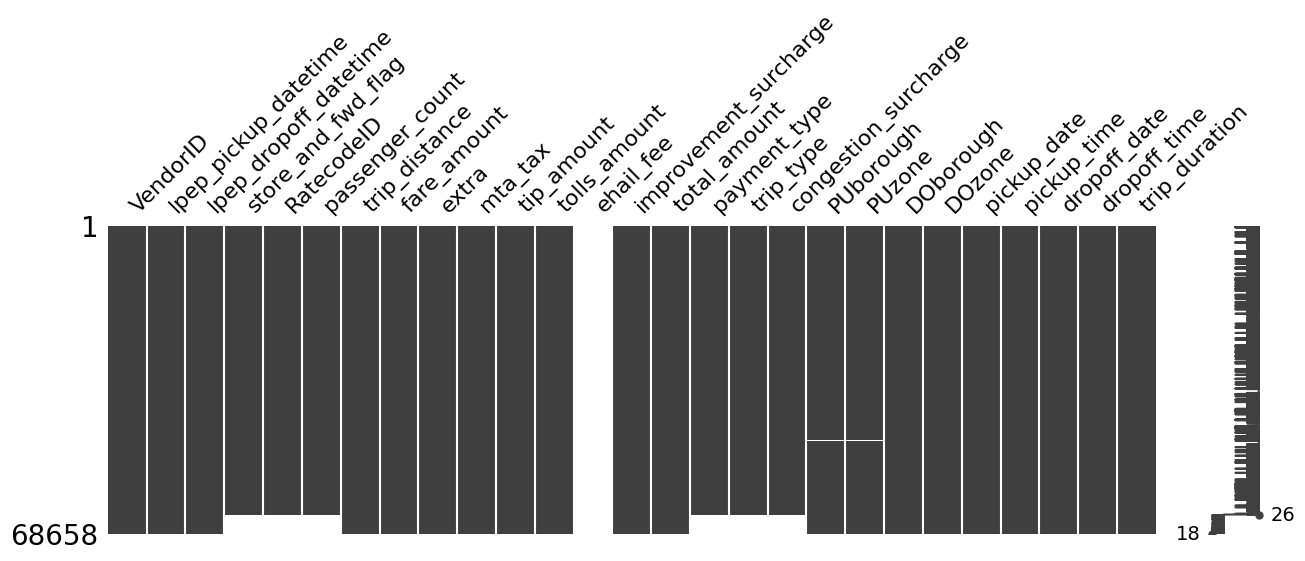

In [474]:
# Visualisasi missing value menggunakan matrix
msno.matrix(df, figsize = (15, 4))
plt.show()

- Dari visualisasi diatas, terlihat bahwa mayoritas baris kosong terdapat pada baris yang sama kecuali kolom `ehail_fee` yang keseluruhan barisnya berisi nilai kosong.

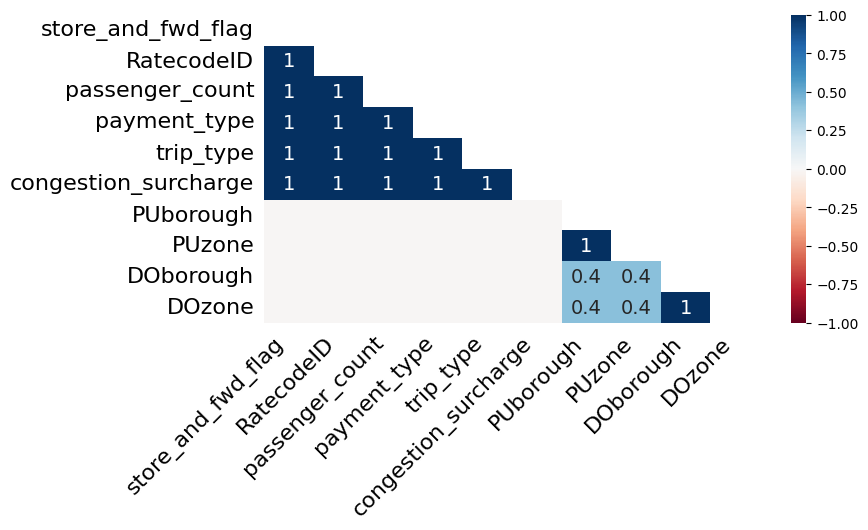

In [475]:
# Visualisasi missing value menggunakan heatmap
msno.heatmap(df, figsize=(8, 4))
plt.show()

- Dari visualisasi diatas, terlihat bahwa terdapat dua korelasi yang bernilai 1 dan 0.4.
- Korelasi bernilai 1 merupakan korelasi positif sempurna. Korelasi ini memiliki missing value di satu kolom dan kolom lainnya.
- Korelasi bernilai 0.4 merupakan korelasi positif sedang yang berarti terdapat hubungan positif antara missing value pada dua kolom namun tidak sempurna. Korelasi ini memiliki missing value di satu kolom dan ada kecenderungan missing value pada kolom lain namun tidak pasti.

In [476]:
# Menghapus kolom 'ehail_fee'
df.drop(columns = 'ehail_fee', inplace = True)

In [477]:
# Melihat data yg kosong
df_missing_value = df[df.isna().any(axis = 1)]

num_rows_missing = len(df_missing_value)
print("Number of rows (missing value):", num_rows_missing)

Number of rows (missing value): 5055


- Pada dataframe terlihat bahwa sebanyak 5055 baris memiliki nilai kosong.

In [478]:
# Menghapus seluruh baris yang memiliki data kosong
df.dropna(inplace = True)

# Menghitung jumlah baris yang tersedia
num_rows = len(df)
print("Number of rows :", num_rows)

Number of rows : 63603


- Tersisa 63.603 baris yang tidak memiliki data kosong.

## Check Duplicate

In [479]:
# Cek data duplikat
df.duplicated().sum()

433

- Terdapat 433 baris yang memiliki data duplikat.

In [480]:
# Menghapus data duplikat
df.drop_duplicates(inplace = True)

# Cek kembali data duplikat
df.duplicated().sum()

0

- Saat ini sudah tidak ada data yang duplikat.

## Zero Values

In [481]:
# Mengurutkan kolom minutes_diff dan melihat perbedaanya
df_sorted = df.sort_values(by = 'trip_duration', ascending = False)
df_sorted

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,congestion_surcharge,PUborough,PUzone,DOborough,DOzone,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_duration
26593,2,2023-01-13 22:13:15,2023-01-14 22:13:08,N,1.0,1.0,0.00,0.0,0.0,0.0,...,0.0,Queens,Queensbridge/Ravenswood,Queens,Astoria,2023-01-13,22:13:15,2023-01-14,22:13:08,1439.88
2146,2,2023-01-02 15:46:00,2023-01-03 15:45:15,N,1.0,1.0,0.00,0.0,0.0,0.0,...,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood,2023-01-02,15:46:00,2023-01-03,15:45:15,1439.25
38466,2,2023-01-19 20:12:15,2023-01-20 20:11:25,N,1.0,1.0,0.00,0.0,0.0,0.0,...,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood,2023-01-19,20:12:15,2023-01-20,20:11:25,1439.17
34094,2,2023-01-18 06:58:14,2023-01-19 06:57:10,N,1.0,1.0,1.09,7.9,0.0,0.5,...,0.0,Manhattan,East Harlem North,Manhattan,Central Harlem,2023-01-18,06:58:14,2023-01-19,06:57:10,1438.93
62549,2,2023-01-31 09:02:52,2023-02-01 09:01:47,N,1.0,1.0,0.87,7.9,0.0,0.5,...,0.0,Manhattan,Central Harlem,Manhattan,Central Harlem North,2023-01-31,09:02:52,2023-02-01,09:01:47,1438.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52564,1,2023-01-26 12:47:11,2023-01-26 12:47:11,N,1.0,1.0,0.00,41.2,0.0,1.5,...,0.0,Brooklyn,Coney Island,Brooklyn,Coney Island,2023-01-26,12:47:11,2023-01-26,12:47:11,0.00
7224,1,2023-01-05 07:54:34,2023-01-05 07:54:34,N,1.0,1.0,1.90,12.8,0.0,1.5,...,0.0,Manhattan,Central Harlem North,Manhattan,Central Harlem North,2023-01-05,07:54:34,2023-01-05,07:54:34,0.00
16853,1,2023-01-09 17:00:08,2023-01-09 17:00:08,N,1.0,1.0,0.00,15.2,0.0,1.5,...,0.0,Brooklyn,Brooklyn Heights,Brooklyn,Brooklyn Heights,2023-01-09,17:00:08,2023-01-09,17:00:08,0.00
25700,1,2023-01-13 16:57:42,2023-01-13 16:57:42,N,1.0,1.0,0.00,18.5,0.0,1.5,...,0.0,Brooklyn,Clinton Hill,Brooklyn,Clinton Hill,2023-01-13,16:57:42,2023-01-13,16:57:42,0.00


- Dari data diatas, dapat terlihat bahwa terdapat `trip_duration` sebesar 0 menit, yang mana ini merupakan data anomali. Selain itu 3 baris teratas memiliki `trip_distance` dan `total_amount` sebesar 0, yang mana ini juga merupakan data anomali. Data anomali ini perlu didrop dari dataframe agar tidak membuat hasil analisa menjadi bias.

In [482]:
# Menghapus baris minutes_diff, trip_distance, dan total_amount yang memiliki nilai 0
df.drop(df.loc[df['trip_duration'] == 0].index, inplace = True)
df.drop(df.loc[df['trip_distance'] == 0].index, inplace = True)
df.drop(df.loc[df['total_amount'] == 0].index, inplace = True)

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,congestion_surcharge,PUborough,PUzone,DOborough,DOzone,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,1.0,2.58,14.9,1.0,0.5,...,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00:26:10,2023-01-01,00:37:11,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,1.0,1.81,10.7,1.0,0.5,...,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00:51:03,2023-01-01,00:57:49,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,1.0,1.30,6.5,0.5,1.5,...,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00:13:14,2023-01-01,00:19:03,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,1.0,1.10,6.0,0.5,1.5,...,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00:33:04,2023-01-01,00:39:02,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,1.0,2.78,17.7,1.0,0.5,...,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00:53:31,2023-01-01,01:11:04,17.55


In [483]:
# Melihat nilai unique pada kolom passenger_count
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 0., 8., 7.])

- Pada kolom `passenger_count` terdapat nilai 0. Kolom ini diisi secara manual oleh driver, sehingga nilai 0 pada kolom ini bisa saja terjadi akibat kelalaian dari driver yang lupa mengisi jumlah penumpang.
- Untuk analisa kali ini, nilai 0 pada kolom `passenger_count` akan diubah menjadi nilai median.

In [484]:
# Menampilkan deskripsi pada kolom passenger_count
df['passenger_count'].describe()

count    60320.000000
mean     1.325912    
std      0.993187    
min      0.000000    
25%      1.000000    
50%      1.000000    
75%      1.000000    
max      8.000000    
Name: passenger_count, dtype: float64

In [485]:
# Mengubah nilai 0 pada kolom passenger_count menjadi 1
df['passenger_count'].replace(0, 1, inplace = True)

- Sudah tidak ada nilai kosong pada kolom `passenger_count`

## Negative Values

In [486]:
# Mengecek apakah ada nilai negatif

trip_neg = df[df['trip_distance'] <= 0]
print(f"Negative value in trip_distance : {len(trip_neg)}")

fare_neg = df[df['fare_amount'] <= 0]
print(f"Negative value in fare_amount : {len(fare_neg)}")

extra_neg = df[df['extra'] < 0]
print(f"Negative value in extra : {len(extra_neg)}")

mta_neg = df[df['mta_tax'] < 0]
print(f"Negative value in mta_tax : {len(mta_neg)}")

tip_neg = df[df['tip_amount'] < 0]
print(f"Negative value in tip_amount : {len(tip_neg)}")

toll_neg = df[df['tolls_amount'] < 0]
print(f"Negative value in tolls_amount : {len(toll_neg)}")

improv_neg = df[df['improvement_surcharge'] < 0]
print(f"Negative value in improvement_surcharge : {len(improv_neg)}")

total_neg = df[df['total_amount'] <= 0]
print(f"Negative value in total_amount : {len(total_neg)}")

cong_neg = df[df['congestion_surcharge'] < 0]
print(f"Negative value in congestion_surcharge : {len(cong_neg)}")

Negative value in trip_distance : 0
Negative value in fare_amount : 108
Negative value in extra : 48
Negative value in mta_tax : 99
Negative value in tip_amount : 0
Negative value in tolls_amount : 0
Negative value in improvement_surcharge : 102
Negative value in total_amount : 102
Negative value in congestion_surcharge : 3


- Pada kolom `trip_distance`, `tip_amount` dan `tolls_amount` tidak ditemukan data dengan nilai dibawah 0 (negatif).
- Pada kolom `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge`, `total_amount` dan `congestion_surcharge` ditemukan data dengan nilai 0 atau dibawahnya. Baris ini perlu dihapus karena nilai negatif pada kolom-kolom ini merupakan data anomali.

In [487]:
# Drop baris yang memiliki nilai negatif
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[df['extra'] < 0].index, inplace = True)
df.drop(df[df['mta_tax'] < 0].index, inplace = True)
df.drop(df[df['improvement_surcharge'] < 0].index, inplace = True)
df.drop(df[df['total_amount'] <= 0].index, inplace = True)
df.drop(df[df['congestion_surcharge'] < 0].index, inplace = True)

## Anomali

In [488]:
# Mengubah kode angka pada VendorID
vendor = {1: 'Creative Mobile Technologies', 2: 'VeriFone'}

df['VendorID'] = df['VendorID'].replace(vendor)
df['VendorID'].unique()

array(['VeriFone', 'Creative Mobile Technologies'], dtype=object)

In [489]:
# Mengubah kode angka pada RatecodeID
rate_code = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5 : 'Negotiated fare', 6 : 'Group ride'}

df['RatecodeID'] = df['RatecodeID'].replace(rate_code)
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark', 'JFK',
       'Nassau or Westchester'], dtype=object)

In [490]:
# Mengubah kode angka pada trip_type
trip = {1: 'Street-hail', 2: 'Dispatch'}

df['trip_type'] = df['trip_type'].replace(trip)
df['trip_type'].unique()

array(['Street-hail', 'Dispatch'], dtype=object)

In [491]:
# Mengubah kode angka pada payment_type
payment = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5 : 'Unknown', 6 : 'Voided trip'}

df['payment_type'] = df['payment_type'].replace(payment)
df['payment_type'].unique()

array(['Credit card', 'Cash', 'No charge', 'Dispute'], dtype=object)

- Tidak terlihat adanya data anomali pada kolom VendorID, RatecodeID, Trip_type, dan Payment_type

In [492]:
# Mengurutkan kolom pickup_date
df['pickup_date'].sort_values(ascending = True)

18009    2009-01-01
303      2022-12-09
324      2022-12-09
0        2023-01-01
870      2023-01-01
            ...    
62870    2023-01-31
62873    2023-01-31
62865    2023-01-31
64321    2023-01-31
25283    2023-02-01
Name: pickup_date, Length: 60212, dtype: object

- Dari data diatas, terlihat bahwa terdapat bulan dan tahun selain Januari 2023. Untuk itulah data yang tidak sesuai akan didrop.

In [493]:
df = df.drop(labels = [18009, 303, 324, 25283], axis = 0)

In [494]:
# Melihat nilai pada kolom trip_distance
df['trip_distance'].sort_values(ascending = False)

33613    1571.97
7388     66.18  
8145     41.74  
38093    38.60  
41228    38.24  
         ...    
21124    0.01   
52629    0.01   
43066    0.01   
56420    0.01   
49655    0.01   
Name: trip_distance, Length: 60208, dtype: float64

- Dari data diatas, terlihat bahwa terdapat 1 nilai yang terlampau jauh dan nilai sebesar 0.01 mile dimana kedua nilai ini merupakan nilai anomali. Maka dari itu, nilai yang terlampau jauh akan dihapus dan diberi batasan dengan menghapus baris yang memiliki nilai dibawah 0.2 miles.

In [495]:
# Drop baris yang memiliki nilai dibawah 0.2 miles dan diatas 1000
df.drop(df.loc[df['trip_distance'] < 0.2].index, inplace = True)
df.drop(df.loc[df['trip_distance'] > 1000].index, inplace = True)

In [496]:
# Melihat nilai pada kolom tip_amount
df['tip_amount'].sort_values(ascending = False)

50950    222.22
38933    80.88 
41178    80.00 
16589    80.00 
31908    79.00 
         ...   
34612    0.00  
34611    0.00  
6453     0.00  
34606    0.00  
37924    0.00  
Name: tip_amount, Length: 59675, dtype: float64

- Dari data diatas, terdapat satu nilai yang terlampau jauh. Untuk hasil analisa yang baik, satu nilai tersebut akan didrop.

In [497]:
# Drop baris yang memiliki nilai diatas 200
df.drop(df.loc[df['tip_amount'] > 200].index, inplace = True)

In [498]:
# Melihat nilai pada kolom trip_duration
df['trip_duration'].sort_values(ascending = False)

34094    1438.93
54581    1438.92
62549    1438.92
31705    1438.77
43078    1438.63
          ...   
56527    0.05   
3154     0.03   
28833    0.03   
11776    0.03   
20363    0.02   
Name: trip_duration, Length: 59674, dtype: float64

- Dari data diatas, terlihat bahwa terdapat perjalanan yang hanya memiliki durasi dibawah 1 menit. Data ini merupakan anomali, maka data ini akan dihapus.

In [499]:
# Drop baris yang memiliki nilai dibawah 1 menit
df.drop(df.loc[df['trip_duration'] < 1].index, inplace = True)

In [500]:
print("Number of rows : ", len(df))

Number of rows :  59542


- Jumlah baris dari data yang telah dibersihkan sejauh ini sejumlah 59542 baris.

## Outlier

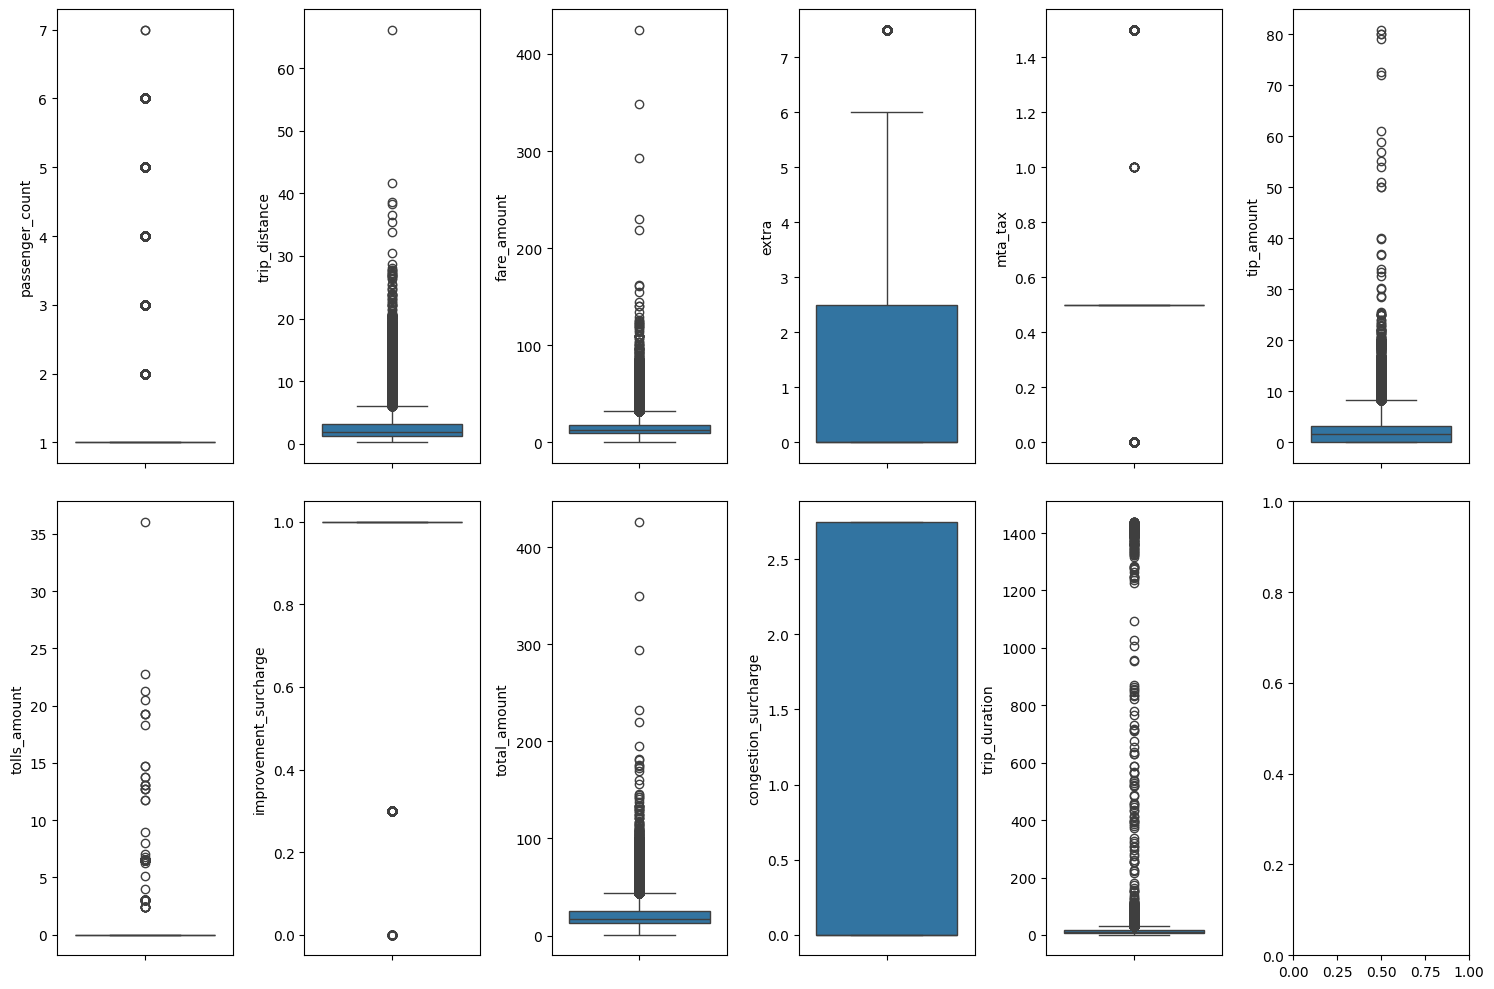

In [501]:
# Membuat boxplot untuk melihat outlier pada masing-masing kolom yang bertipe numerik

fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize = (15,10))
index = 0
axs = axs.flatten()

for idx, col in df.select_dtypes(include = [np.number]).items():
    sns.boxplot(y = idx, data = df, ax = axs[index])
    index += 1

plt.tight_layout(w_pad = 0.5, h_pad = 2)

- Dari visualisasi diatas, terlihat bahwa seluruh kolom pada data tidak berdistribusi normal dan mayoritas memiliki nilai outlier.

## Export data yang sudah dicleaning

In [502]:
# Simpan file to csv
df.to_csv('nyc_preparation.csv', index = None, header = True)

# Data Analysis


## 1. Overview Data

In [503]:
# Rincian data secara keseluruhan
print(f"Total Trip :", df['VendorID'].count())
print(f"Average Trip Distance : {df['trip_distance'].mean().round(2)} miles")
print(f"Average Trip Duration : {df['trip_duration'].mean().round(2)} minutes")
print(f"Average Fare Amount : ${df['fare_amount'].mean().round(2)}")
print(f"Average Tip Amount : ${df['tip_amount'].mean().round(2)}")

Total Trip : 59542
Average Trip Distance : 2.67 miles
Average Trip Duration : 17.95 minutes
Average Fare Amount : $15.77
Average Tip Amount : $2.11


## 2. Time

Menganalisa perilaku konsumen berdasarkan waktu penjemputan termasuk pola perhari, menganalisa jam-jam sibuk dan kapan kebutuhan taxi paling tinggi.

In [504]:
# Kebutuhan taksi selama bulan januari
trip_jan = df.groupby(df['lpep_pickup_datetime'].dt.date).agg(total_trip = ('lpep_pickup_datetime', 'count')).reset_index()
trip_jan['lpep_pickup_datetime'] = pd.to_datetime(trip_jan['lpep_pickup_datetime'])

# Membuat kolom untuk mengeluarkan tanggal
trip_jan['date'] = trip_jan.lpep_pickup_datetime.apply(lambda x: x.strftime("%d")).astype('object')

# Membuat kolom untuk mengeluarkan minggu
trip_jan['week'] = trip_jan.lpep_pickup_datetime.apply(lambda x: x.strftime("%W")).astype('object')

# Membuat kolom untuk hari
trip_jan['day'] = trip_jan['lpep_pickup_datetime'].dt.day_name()

# Membuat kolom kategori hari
trip_jan['category'] = trip_jan['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

trip_jan

,lpep_pickup_datetime,total_trip,date,week,day,category
0,2023-01-01,1187,01,00,Sunday,Weekend
1,2023-01-02,1371,02,01,Monday,Weekdays
2,2023-01-03,1848,03,01,Tuesday,Weekdays
3,2023-01-04,2103,04,01,Wednesday,Weekdays
4,2023-01-05,2093,05,01,Thursday,Weekdays
5,2023-01-06,2221,06,01,Friday,Weekdays
6,2023-01-07,1895,07,01,Saturday,Weekend
7,2023-01-08,1457,08,01,Sunday,Weekend
8,2023-01-09,1949,09,02,Monday,Weekdays
9,2023-01-10,1905,10,02,Tuesday,Weekdays


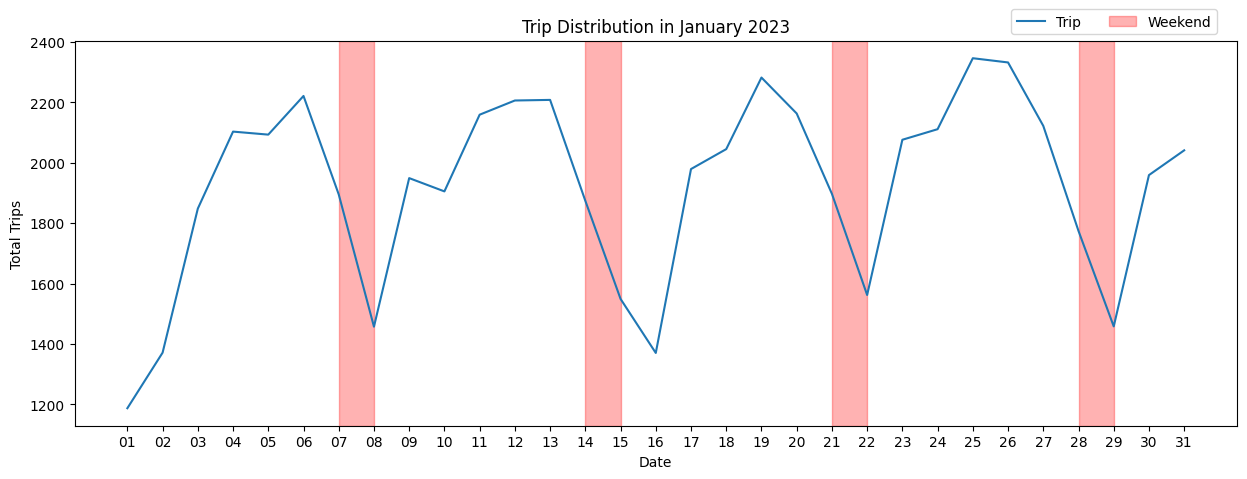

In [505]:
plt.style.use('default')
plt.figure(figsize = (15, 5))

sns.lineplot(data = trip_jan, x = 'date', y = 'total_trip', errorbar = None)

# Membuat garis untuk membedakan waktu weekend
plt.axvspan(6, 7, alpha = 0.3, color = 'red')
plt.axvspan(13, 14, alpha = 0.3, color = 'red')
plt.axvspan(20, 21, alpha = 0.3, color = 'red')
plt.axvspan(27, 28, alpha = 0.3, color = 'red')

plt.legend(['Trip', 'Weekend'], bbox_to_anchor = (0.8, 1.1), ncol = 2, loc = 'upper left')

plt.title('Trip Distribution in January 2023')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.show()

Insights:
- Penggunaan taxi selalu mengalami penurunan pada hari Weekend. Dapat disimpulkan bahwa mayoritas konsumen menggunakan taxi untuk urusan pekerjaan.

In [506]:
# Membuat dataframe berdasarkan jam
trip_hour = df['lpep_pickup_datetime'].reset_index()
trip_hour['hour'] = trip_hour.lpep_pickup_datetime.apply(lambda x: x.hour).astype('object')

# Membuat kolom untuk hari
trip_hour['day'] = trip_hour['lpep_pickup_datetime'].dt.day_name()

# Membuat kolom kategori hari
trip_hour['category'] = trip_hour['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
trip_hour

,index,lpep_pickup_datetime,hour,day,category
0,0,2023-01-01 00:26:10,0,Sunday,Weekend
1,1,2023-01-01 00:51:03,0,Sunday,Weekend
2,3,2023-01-01 00:13:14,0,Sunday,Weekend
3,4,2023-01-01 00:33:04,0,Sunday,Weekend
4,5,2023-01-01 00:53:31,0,Sunday,Weekend
...,...,...,...,...,...
59537,64317,2023-01-31 23:09:22,23,Tuesday,Weekday
59538,64318,2023-01-31 23:06:18,23,Tuesday,Weekday
59539,64319,2023-01-31 23:17:03,23,Tuesday,Weekday
59540,64320,2023-01-31 23:29:18,23,Tuesday,Weekday


In [507]:
# Membuat dataframe baru berisikan total trip pada category Weekday
trip_hour_weekday = trip_hour[trip_hour['category'] == 'Weekday'][['hour', 'category']].groupby('hour').count().reset_index()
trip_hour_weekday.rename(columns = {'category' : 'total_trip_weekday'}, inplace = True)

# Membuat dataframe baru berisikan total trip pada category Weekend
trip_hour_weekend = trip_hour[trip_hour['category'] == 'Weekend'][['hour', 'category']].groupby('hour').count().reset_index()
trip_hour_weekend.rename(columns = {'category' : 'total_trip_weekend'}, inplace = True)

# Menggabungkan kedua dataframe diatas menjadi satu
trip_hour_new = pd.merge(trip_hour_weekday, trip_hour_weekend, on = 'hour').drop(columns = 'hour')
trip_hour_new

,total_trip_weekday,total_trip_weekend
0,504,443
1,317,424
2,196,312
3,191,264
4,133,206
5,214,106
6,719,93
7,2051,202
8,2422,299
9,2521,453


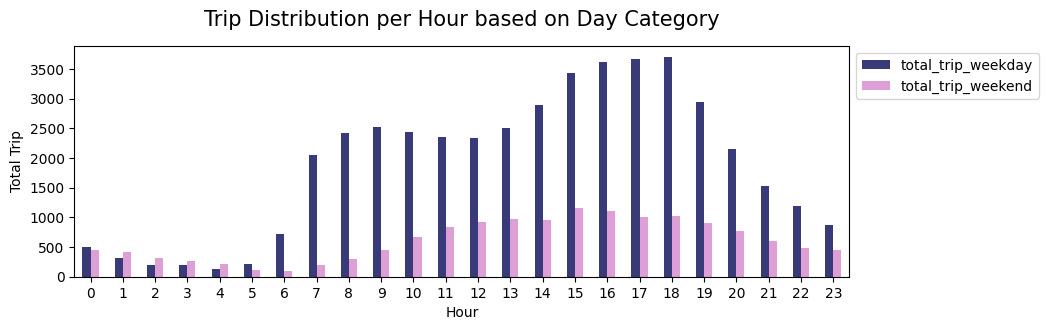

In [508]:
# Distribution Trip based on hour
ax = trip_hour_new.plot(kind = 'bar', figsize = (10, 3), rot = 0, colormap = 'tab20b')
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.title("Trip Distribution per Hour based on Day Category", fontsize = 15, y = 1.05)
plt.xlabel("Hour")
plt.ylabel("Total Trip")
plt.show()

Insights:
- Pada hari Weekday, konsumen paling sering menggunakan taxi sekitar jam 15-18 dimana pada jam-jam ini merupakan jam pulang kerja. Sedangkan pada jam 0-5 adalah jam paling sepi penggunaan taxi dikarenakan pada jam-jam ini merupakan jam istirahat.
- Pada hari Weekend, konsumen paling sering menggunakan taxi pada jam 15-16. Sedangkan paling sedikit terjadi pada jam 5-6.

In [509]:
# Melihat banyaknya perjalanan berdasarkan hari
sort_day = trip_jan.groupby('day')['total_trip'].sum().sort_values(ascending = False).reset_index()
sort_day['sorting_values'] = [2, 4, 1, 5, 3, 6, 7]
sort_day = sort_day.sort_values(by = 'sorting_values')
sort_day.drop(columns = 'sorting_values', inplace = True)
sort_day

,day,total_trip
2,Monday,8725
0,Tuesday,9884
4,Wednesday,8653
1,Thursday,8913
3,Friday,8714
5,Saturday,7440
6,Sunday,7213


In [510]:
# Melihat banyaknya perjalanan berdasarkan categori
sort_category = trip_jan.groupby('category')['total_trip'].sum().sort_values(ascending = False).reset_index()
sort_category

,category,total_trip
0,Weekdays,44889
1,Weekend,14653


<ipython-input-511-a1e046733ecd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = sort_day, x = 'day', y = 'total_trip', palette = 'Spectral')


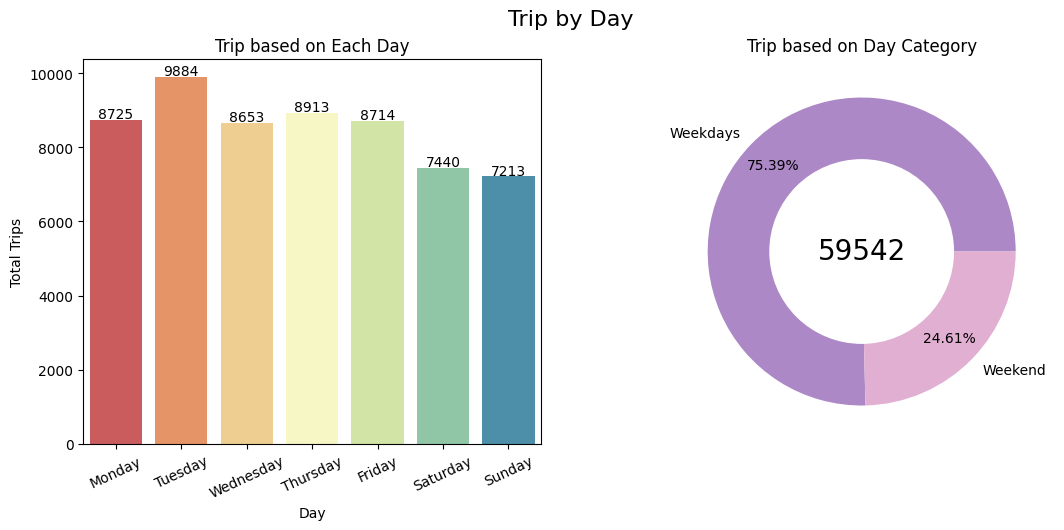

In [511]:
plt.figure(figsize = (13, 5))
plt.suptitle('Trip by Day', fontsize = 16)

# ================

# Day
plt.subplot(1,2,1)

bars = sns.barplot(data = sort_day, x = 'day', y = 'total_trip', palette = 'Spectral')

for idx, bar in enumerate(bars.patches) :
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 50
    label = "{:.0f}".format(sort_day['total_trip'].iloc[idx])
    plt.text(x_value, y_value, label, ha = 'center')

plt.xticks(rotation = 25)
plt.title('Trip based on Each Day')
plt.xlabel('Day')
plt.ylabel('Total Trips')

# ================

# Day Category
plt.subplot(1,2,2)

plt.pie(data = sort_category, x = 'total_trip', labels = 'category',
        pctdistance = 0.8, autopct = '%1.2f%%', colors = ['#AD88C6', '#E1AFD1'])

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle)

plt.title('Trip based on Day Category')
plt.text(0, 0, len(df), ha = 'center', va = 'center', fontsize = 20)

# ================

plt.subplots_adjust(wspace = 0.2)
plt.show()

Insights:
- Penggunaan taxi paling banyak terjadi pada Weekday, lebih tepatnya hari Selasa. Hal ini dapat terjadi dikarenakan konsumen perlu menggunakan transportasi untuk pergi bekerja.

## 3. Duration and Distance

In [512]:
# Melihat jumlah jarak tempuh perjalanan
distance = df.groupby('trip_distance').agg(Total = ('trip_distance', 'count'))\
              .sort_values(by = 'trip_distance', ascending = False).reset_index()
distance

,trip_distance,Total
0,66.18,1
1,41.74,1
2,38.60,1
3,38.24,1
4,36.61,1
...,...,...
1627,0.24,18
1628,0.23,16
1629,0.22,21
1630,0.21,11


In [513]:
# Membuat fungsi untuk menentukan jarak tempuh perjalanan
def identify_distance(miles):
    if miles <= 2 :
        distance = 'Very Short Distance'
    elif miles > 2 and miles <= 6 :
        distance = 'Short Distance'
    elif miles > 6 and miles <= 10 :
        distance = 'Medium Distance'
    elif miles > 10 :
        distance = 'Long Distance'
    return distance

# Membuat dataframe baru yang berisikan jarak tempuh
distance_new = df['trip_distance'].apply(identify_distance)
distance_new = pd.DataFrame(distance_new)
distance_new = distance_new.groupby('trip_distance').agg(Total = ('trip_distance', 'count'))\
              .sort_values(by = 'trip_distance', ascending = False).reset_index()
distance_new

,trip_distance,Total
0,Very Short Distance,31804
1,Short Distance,22682
2,Medium Distance,3848
3,Long Distance,1208


In [514]:
# Melihat jumlah jarak tempuh perjalanan
duration = df.groupby('trip_duration').agg(Total = ('trip_duration', 'count'))\
              .sort_values(by = 'trip_duration', ascending = False).reset_index()
duration

,trip_duration,Total
0,1438.93,1
1,1438.92,2
2,1438.77,1
3,1438.63,1
4,1438.62,1
...,...,...
3316,1.08,3
3317,1.07,5
3318,1.05,4
3319,1.03,5


In [515]:
# Membuat fungsi untuk menentukan jarak tempuh perjalanan
def identify_duration(minutes):
    if minutes <= 10 :
        duration = 'Very Short Duration'
    elif minutes > 10 and minutes <= 20 :
        duration = 'Short Duration'
    elif minutes > 20 and minutes <= 30 :
        duration = 'Medium Duration'
    elif minutes > 30 :
        duration = 'Long Duration'
    return duration

# Membuat dataframe baru yang berisikan jarak tempuh
duration_new = df['trip_duration'].apply(identify_duration)
duration_new = pd.DataFrame(duration_new)
duration_new = duration_new.groupby('trip_duration').agg(Total = ('trip_duration', 'count'))\
              .sort_values(by = 'trip_duration', ascending = False).reset_index()
duration_new

,trip_duration,Total
0,Very Short Duration,25282
1,Short Duration,24262
2,Medium Duration,6758
3,Long Duration,3240


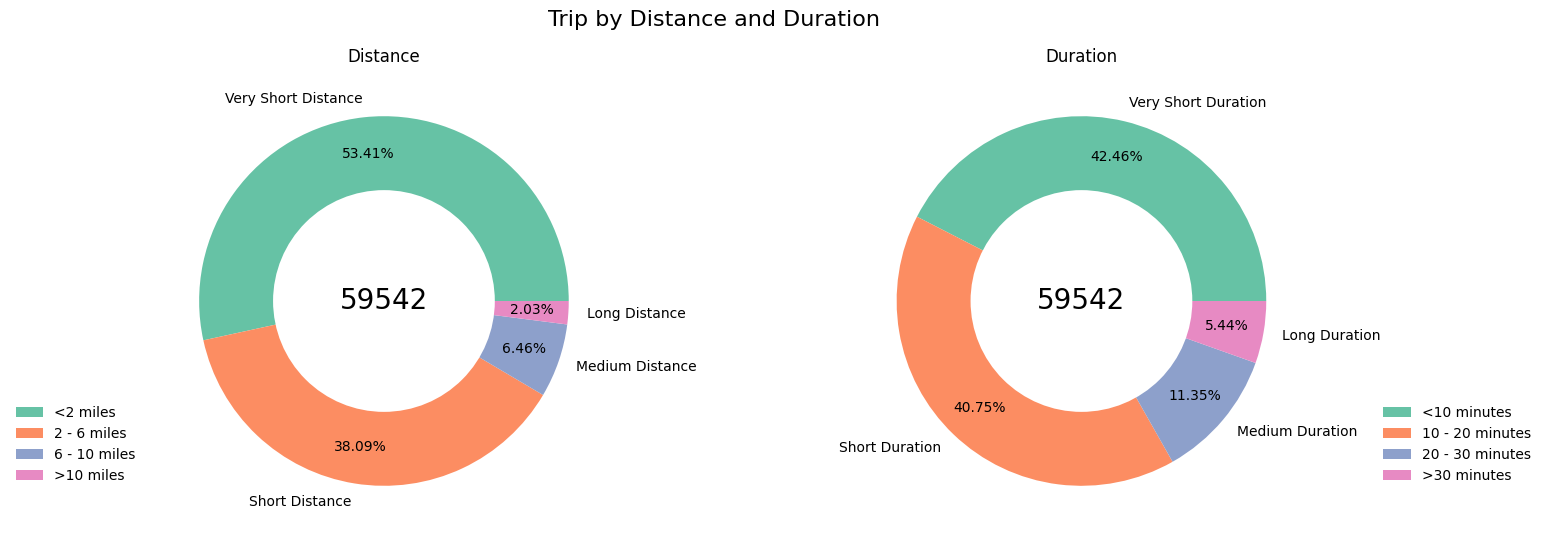

In [516]:
plt.figure(figsize=(15,6))
plt.suptitle('Trip by Distance and Duration', fontsize=16)
color = sns.color_palette("Set2")

# ================

# Trip Distance
plt.subplot(1,2,1)

plt.pie(data = distance_new,
        x = 'Total',
        labels = 'trip_distance',
        pctdistance = 0.8,
        autopct = '%1.2f%%',
        # explode = (0.1,0,0,0),
        colors = color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle)

plt.title('Distance')
L = plt.legend(bbox_to_anchor = (-0.01,0.3))
L.get_frame().set_alpha(0)
L.get_texts()[0].set_text('<2 miles')
L.get_texts()[1].set_text('2 - 6 miles')
L.get_texts()[2].set_text('6 - 10 miles')
L.get_texts()[3].set_text('>10 miles')
plt.text(0, 0, len(df), ha = 'center', va = 'center', fontsize = 20)

# ================

# Trip Duration
plt.subplot(1,2,2)

plt.pie(data = duration_new,
        x = 'Total',
        labels = 'trip_duration',
        pctdistance = 0.8,
        autopct = '%1.2f%%',
        # explode = (0.1,0,0,0),
        colors = color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle)

plt.title('Duration')
L = plt.legend(bbox_to_anchor = (1.5, 0.3))
L.get_frame().set_alpha(0)
L.get_texts()[0].set_text('<10 minutes')
L.get_texts()[1].set_text('10 - 20 minutes')
L.get_texts()[2].set_text('20 - 30 minutes')
L.get_texts()[3].set_text('>30 minutes')
plt.text(0, 0, len(df), ha = 'center', va = 'center', fontsize = 20)

# ================

plt.subplots_adjust(wspace = 0.5)
plt.show()

Insights :
- Jarak tempuh perjalanan yang dilakukan oleh konsumen paling banyak sejauh kurang dari 2 miles
- Lama waktu perjalanan yang dilakukan oleh konsumen paling banyak selama kurang dari 10 menit

## 4. Pick Up and Drop Off (Borough and Zone)

In [517]:
# Jumlah penggunaan taxi di masing-masing borough (wilayah)
borough_pickup = df.groupby('PUborough').agg(Total = ('PUborough', 'count')).sort_values(by = 'Total', ascending = False).reset_index()
borough_pickup

,PUborough,Total
0,Manhattan,36370
1,Queens,15553
2,Brooklyn,7083
3,Bronx,528
4,Staten Island,8


In [518]:
borough_dropoff = df.groupby('DOborough').agg(Total = ('DOborough', 'count')).sort_values(by = 'Total', ascending = False).reset_index()
borough_dropoff

,DOborough,Total
0,Manhattan,36285
1,Queens,15373
2,Brooklyn,6155
3,Bronx,1701
4,EWR,20
5,Staten Island,8


In [519]:
# Jumlah penggunaan taxi di masing-masing zona
zone_pickup = df.groupby(['PUzone', 'PUborough']).agg(Total = ('PUzone', 'count')).sort_values(by = 'Total', ascending = False).reset_index()
zone_pickup.head()

,PUzone,PUborough,Total
0,East Harlem North,Manhattan,12614
1,East Harlem South,Manhattan,8607
2,Forest Hills,Queens,3621
3,Central Harlem,Manhattan,3607
4,Morningside Heights,Manhattan,3548


In [520]:
zone_dropoff = df.groupby(['DOzone', 'PUborough']).agg(Total = ('DOzone', 'count')).sort_values(by = 'Total', ascending = False).reset_index()
zone_dropoff.head()

,DOzone,PUborough,Total
0,East Harlem South,Manhattan,3209
1,East Harlem North,Manhattan,3068
2,Upper East Side North,Manhattan,2597
3,Central Harlem,Manhattan,2402
4,Upper West Side North,Manhattan,2200


<ipython-input-521-bd721e57c910>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = borough_pickup,
<ipython-input-521-bd721e57c910>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = zone_pickup.head(5),
<ipython-input-521-bd721e57c910>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = borough_dropoff.head(5),


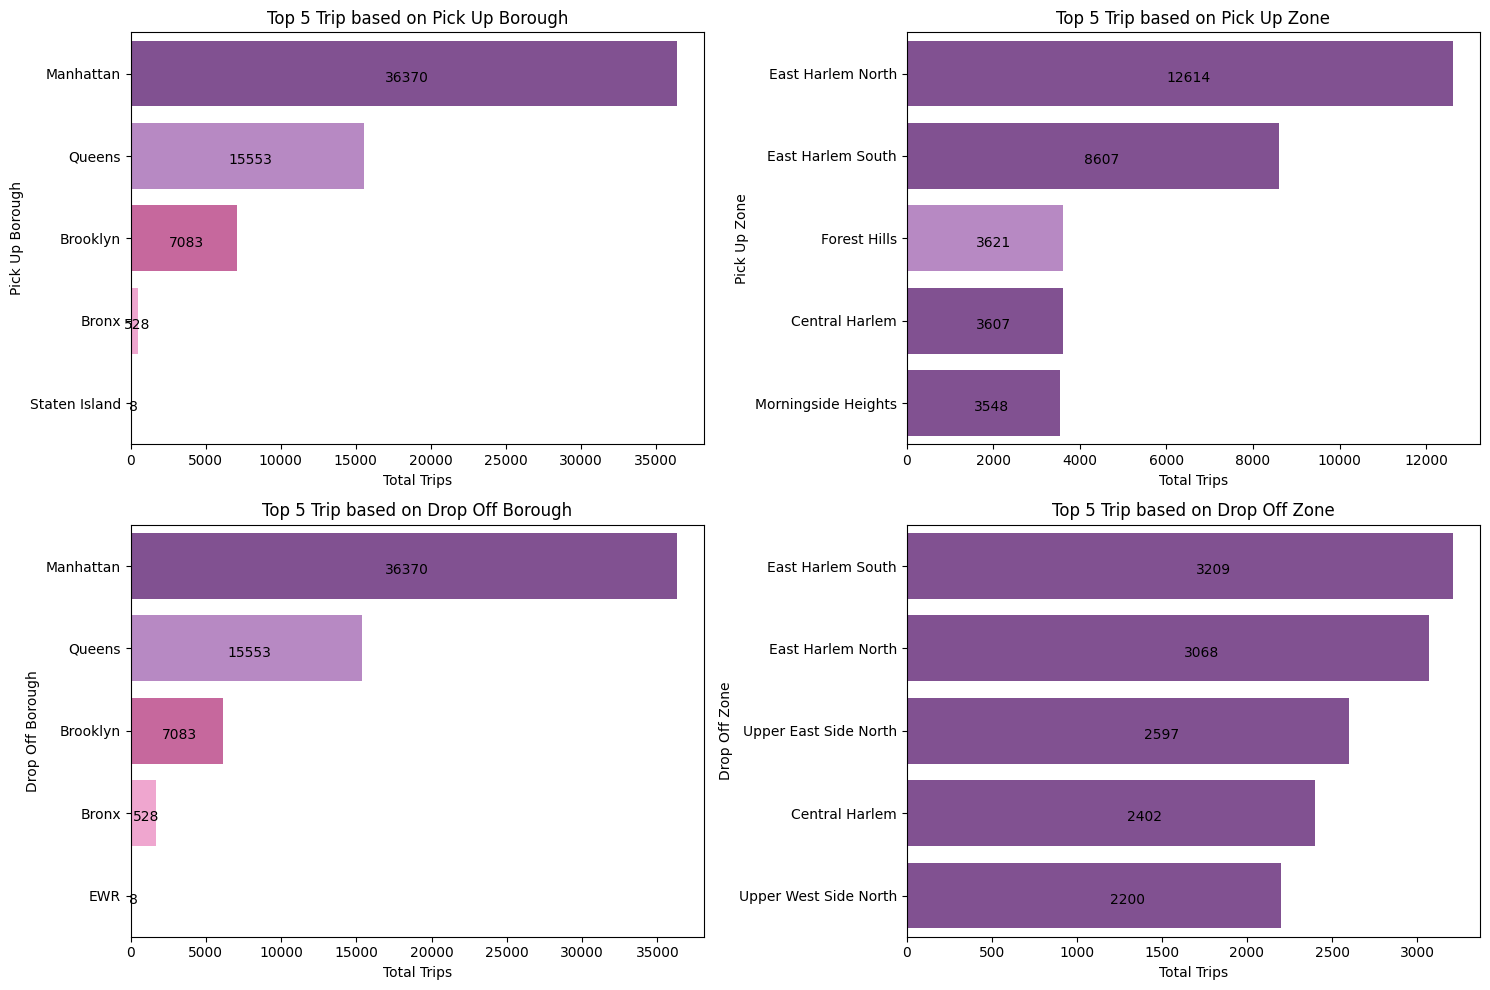

In [521]:
plt.figure(figsize = (15, 10))

# Pick Up Borough
bars = sns.barplot(data = borough_pickup,
                   y = 'PUborough',
                   x = 'Total',
                   palette = ['#86469C', '#BC7FCD', '#D6589F', '#FB9AD1', '#FFCDEA'],
                   ax = plt.subplot(2,2,1))

for idx, bar in enumerate(bars.patches) :
    y_value = bar.get_y() + ((bar.get_height() / 2) + 0.1)
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(borough_pickup['Total'].iloc[idx])
    plt.text(x_value / 2, y_value, label, ha = 'center')

plt.title('Top 5 Trip based on Pick Up Borough')
plt.xlabel('Total Trips')
plt.ylabel('Pick Up Borough')

# =================

# Pick Up Zone
bars = sns.barplot(data = zone_pickup.head(5),
                   y = 'PUzone',
                   x = 'Total',
                   palette = ['#86469C', '#86469C', '#BC7FCD', '#86469C', '#86469C'],
                   ax = plt.subplot(2,2,2))

for idx, bar in enumerate(bars.patches) :
    y_value = bar.get_y() + ((bar.get_height() / 2) + 0.1)
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(zone_pickup['Total'].iloc[idx])
    plt.text(x_value / 2, y_value, label, ha = 'center')

plt.title('Top 5 Trip based on Pick Up Zone')
plt.xlabel('Total Trips')
plt.ylabel('Pick Up Zone')

# =================

# Drop Off Borough
bars = sns.barplot(data = borough_dropoff.head(5),
                   y = 'DOborough',
                   x = 'Total',
                   palette = ['#86469C', '#BC7FCD', '#D6589F', '#FB9AD1', '#FFCDEA'],
                   ax = plt.subplot(2,2,3))

for idx, bar in enumerate(bars.patches) :
    y_value = bar.get_y() + ((bar.get_height() / 2) + 0.1)
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(borough_pickup['Total'].iloc[idx])
    plt.text(x_value / 2, y_value, label, ha = 'center')

plt.title('Top 5 Trip based on Drop Off Borough')
plt.xlabel('Total Trips')
plt.ylabel('Drop Off Borough')

# =================

# Drop Off Zone
bars = sns.barplot(data = zone_dropoff.head(5),
                   y = 'DOzone',
                   x = 'Total',
                   color = '#86469C',
                   ax = plt.subplot(2,2,4))

for idx, bar in enumerate(bars.patches) :
    y_value = bar.get_y() + ((bar.get_height() / 2) + 0.1)
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(zone_dropoff['Total'].iloc[idx])
    plt.text(x_value / 2, y_value, label, ha = 'center')

plt.title('Top 5 Trip based on Drop Off Zone')
plt.xlabel('Total Trips')
plt.ylabel('Drop Off Zone')

# =================

plt.tight_layout()
plt.show()

Insights:
- Lokasi penjemputan dan pengantaran paling banyak terjadi di wilayah Manhattan.
- East Harlem sendiri merupakan zona padat penduduk, sehingga wajar apabila lokasi penjemputan dan pengantaran paling banyak berada di kedua zona ini, yaitu East Harlem South dan East Harlem North. Kedua zona ini berada di wilayah Manhattan.

## 5. Payment and Trip Type

In [522]:
# Melihat mayoritas customer berdasarkan tipe pembayaran
pay_type = df.groupby('payment_type').agg(total = ('payment_type', 'count')).sort_values(by = 'total', ascending=False).reset_index()
pay_type

,payment_type,total
0,Credit card,38043
1,Cash,21326
2,No charge,143
3,Dispute,30


In [523]:
# Mengubah kategori 'No charge' dan 'Dispute' menjadi 'Others'
pay_type['payment_type'] = pay_type['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
pay_type = pay_type.groupby('payment_type').agg(total = ('total', 'sum')).sort_values(by = 'total', ascending = False).reset_index()
pay_type

,payment_type,total
0,Credit card,38043
1,Cash,21326
2,Other,173


In [524]:
# Tipe perjalanan
trip_type = df.groupby('trip_type').agg(total = ('trip_type', 'count')).sort_values(by = 'total', ascending=False).reset_index()
trip_type

,trip_type,total
0,Street-hail,58939
1,Dispatch,603


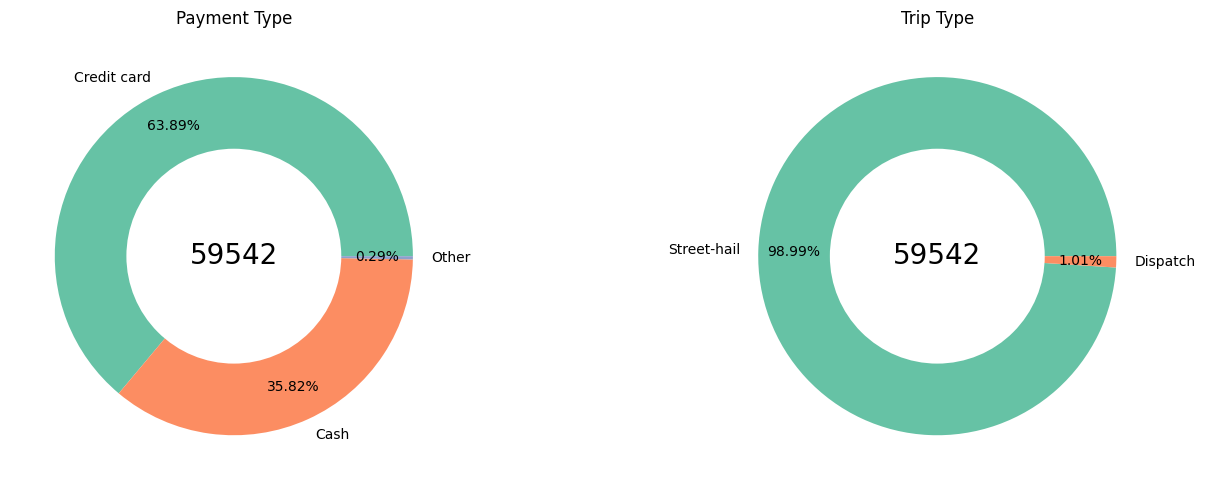

In [525]:
plt.figure(figsize=(15,5))

# ============

# Tipe Pembayaran

color = sns.color_palette("Set2")
plt.subplot(1,2,1)

plt.pie(data = pay_type,
        x = 'total',
        labels = 'payment_type',
        pctdistance = 0.8,
        autopct = '%1.2f%%',
        # explode = (0.1, 0, 0),
        colors = color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Type')
plt.text(0, 0, len(df), ha = 'center', va = 'center', fontsize = 20)

# ============

# Trip Type

plt.subplot(1,2,2)
plt.pie(data = trip_type,
        x = 'total',
        labels = 'trip_type',
        pctdistance = 0.8,
        autopct = '%1.2f%%',
        # explode = (0.1,0),
        colors = color)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Type')
plt.text(0, 0, len(df), ha = 'center', va = 'center', fontsize = 20)

# ============

plt.tight_layout()
plt.show()

Insights:
- Pembayaran menggunakan kartu kredit menjadi jenis pembayaran yang paling banyak digunakan oleh konsumen.
- Mayoritas konsumen melakukan perjalanan dengan memberhentikan taxi di pinggir jalan.

## 6. Passenger Count

In [526]:
# Melihat mayoritas customer berdasarkan passenger count
passenger = df.groupby('passenger_count').agg(total = ('passenger_count', 'count')).reset_index()
passenger

,passenger_count,total
0,1.0,50776
1,2.0,4772
2,3.0,885
3,4.0,352
4,5.0,1739
5,6.0,1016
6,7.0,2


<ipython-input-527-607bfd81ce94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = passenger,


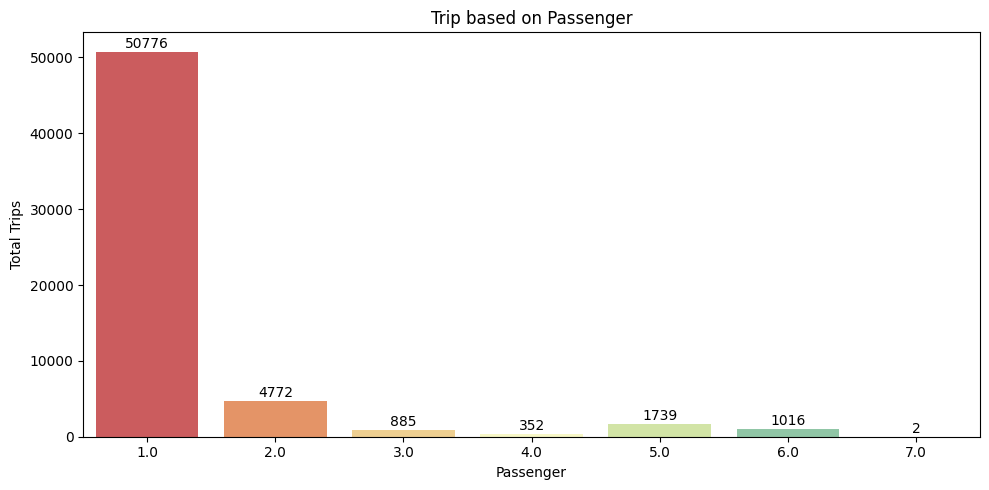

In [527]:
plt.figure(figsize = (10, 5))

bars = sns.barplot(data = passenger,
                   y = 'total',
                   x = 'passenger_count',
                   palette = 'Spectral')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 500
    label = "{:.0f}".format(passenger['total'].iloc[idx])
    plt.text(x_value, y_value, label, ha = 'center')

plt.title('Trip based on Passenger')
plt.xlabel('Passenger')
plt.ylabel('Total Trips')

plt.tight_layout()
plt.show()

Insights:
- Penggunaan taxi cenderung perorangan daripada perkelompok.

## 7. Fare & Tip Amount

In [528]:
sort_time = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
amount_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount', 'sum'),
                                                                    avg_fare_amount=('fare_amount', 'mean'),
                                                                    median_fare_amount=('fare_amount', 'median')).reset_index()
amount_by_time = df.groupby('pickup_time').agg(total_fare_amount=('fare_amount', 'sum'),
                                               avg_fare_amount=('fare_amount', 'mean'),
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)


In [529]:
# Membuat dataframe fare amount berdasarkan jam
fare = df[['lpep_pickup_datetime', 'fare_amount', 'tip_amount']].reset_index()
fare['hour'] = trip_hour.lpep_pickup_datetime.apply(lambda x: x.hour).astype('object')
fare = fare.groupby('hour').agg(total_fare_amount = ('fare_amount', 'sum'), avg_fare_amount=('fare_amount', 'mean'),
                                total_tip = ('tip_amount', 'sum'), avg_tip=('tip_amount', 'mean')).reset_index()
fare

,hour,total_fare_amount,avg_fare_amount,total_tip,avg_tip
0,0,15021.11,15.861785,1686.77,1.781172
1,1,12124.80,16.362753,1586.69,2.141282
2,2,9440.20,18.583071,1004.20,1.976772
3,3,8826.50,19.398901,977.87,2.149165
4,4,6676.80,19.695575,682.97,2.014661
5,5,6532.79,20.414969,770.42,2.407563
6,6,12596.10,15.512438,1688.35,2.079249
7,7,33289.48,14.775624,4563.80,2.025655
8,8,43249.94,15.894870,5985.36,2.199691
9,9,47009.61,15.806863,6154.29,2.069364


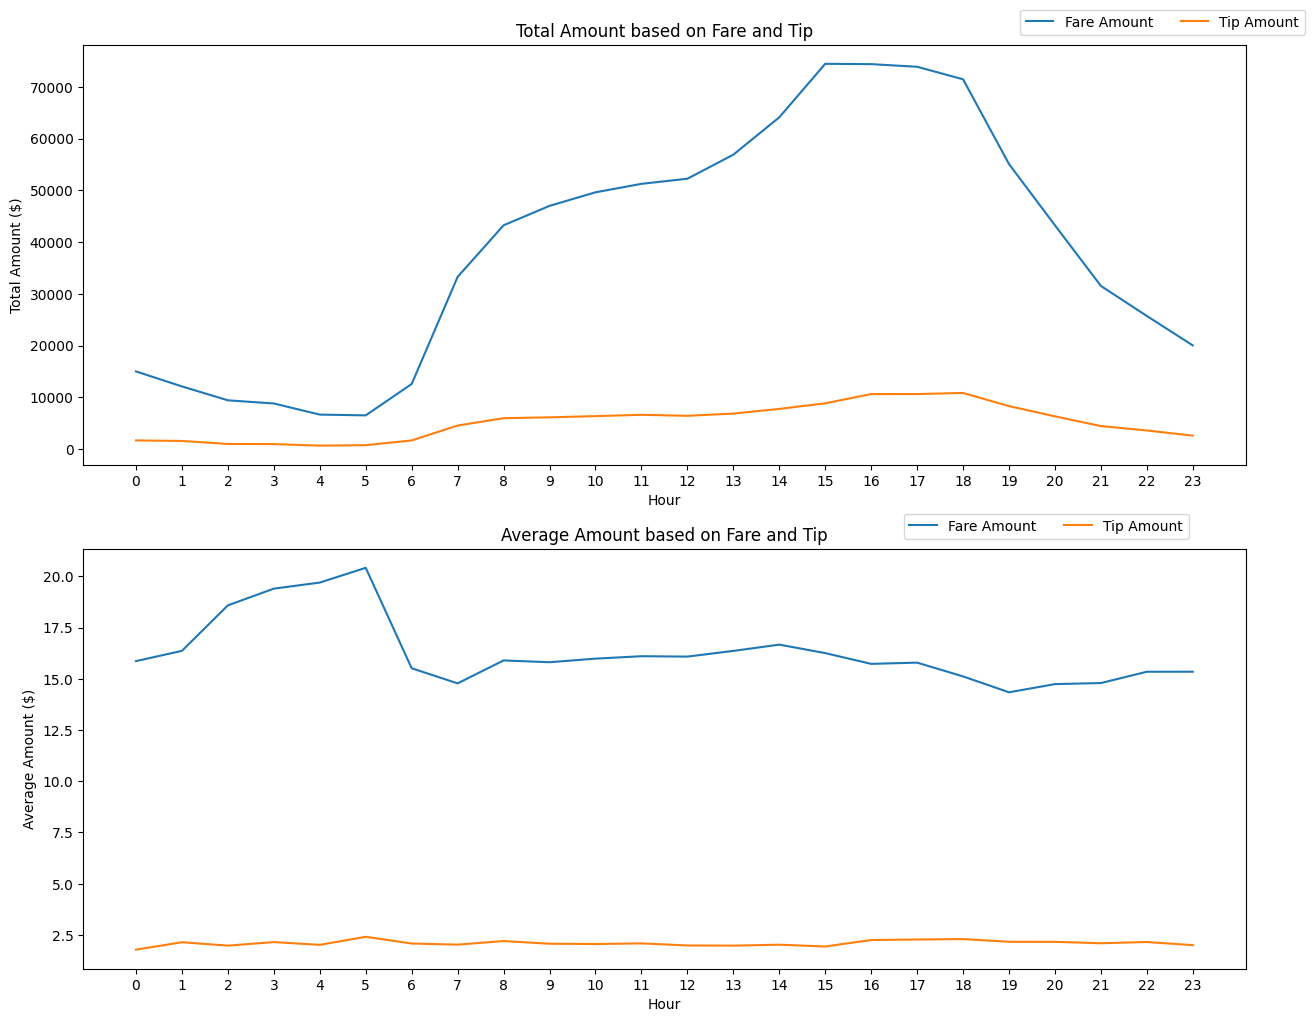

In [530]:
plt.style.use('default')
plt.figure(figsize = (15, 12))

# =================

# Total Amount
plt.subplot(2, 1, 1)

sns.lineplot(data = fare, x = 'hour', y = 'total_fare_amount', errorbar = None, label = 'Fare Amount')
sns.lineplot(data = fare, x = 'hour', y = 'total_tip', errorbar = None, label = 'Tip Amount')

plt.legend(bbox_to_anchor = (0.8, 1.1), ncol = 2, loc = 'upper left')
plt.xticks(ticks = np.arange(0, 24))

plt.title('Total Amount based on Fare and Tip')
plt.xlabel('Hour')
plt.ylabel('Total Amount ($)')

# =================

# Average Amount
plt.subplot(2, 1, 2)

sns.lineplot(data = fare, x = 'hour', y = 'avg_fare_amount', errorbar = None, label = 'Fare Amount')
sns.lineplot(data = fare, x = 'hour', y = 'avg_tip', errorbar = None, label = 'Tip Amount')

plt.legend(bbox_to_anchor = (0.7, 1.1), ncol = 2, loc = 'upper left')
plt.xticks(ticks = np.arange(0, 24))

plt.title('Average Amount based on Fare and Tip')
plt.xlabel('Hour')
plt.ylabel('Average Amount ($)')

plt.show()

Insights:
- Seiring dengan bertambahnya jumlah tarif, jumlah tip juga ikut meningkat.
- Jumlah tarif paling tinggi terjadi pada pukul 15.00 - 18.00 sore.
- Untuk harga rata-rata, pada tengah malam pukul 02.00 - 05.00 malam relatif lebih mahal dibandingkan pada waktu lainnya dengan harga rata-rata dapat mencapai \$20.

In [531]:
fare_time = df[['lpep_pickup_datetime', 'fare_amount', 'tip_amount']].reset_index()

# Memberikan batasan untuk kategori waktu
hour_step = [0, 5, 11, 15, 20, 24]
time_cat = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

fare_time['time_category'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins = hour_step, labels = time_cat, right = False)
fare_time['hour'] = trip_hour.lpep_pickup_datetime.apply(lambda x: x.hour).astype('object')

fare_time = fare_time.groupby('time_category').agg(total_fare_amount = ('fare_amount', 'sum'),
                                            avg_fare_amount = ('fare_amount', 'mean'),
                                            total_tip = ('tip_amount', 'sum'),
                                            avg_tip = ('tip_amount', 'mean')).reindex(sort_time).reset_index()

fare_time

,time_category,total_fare_amount,avg_fare_amount,total_tip,avg_tip
0,Midnight,46759.65,16.202235,6393.12,2.215218
1,Morning,175163.81,15.638230,23156.25,2.067338
2,Noon,200849.62,15.587863,27702.59,2.149988
3,Evening,326817.70,15.718435,43130.86,2.074397
4,Night,118876.48,16.224441,15580.34,2.126428


<ipython-input-532-0dba63c1b6d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = fare_time, y = 'total_fare_amount', x = 'time_category', palette = 'Spectral')
<ipython-input-532-0dba63c1b6d9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = fare_time, y = 'avg_fare_amount', x = 'time_category', palette = 'Spectral')
<ipython-input-532-0dba63c1b6d9>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data = fare_time, y = 'total_tip', x = 'time_category', palette = 'Spectral')
<ipython-input-532-0dba63c1b6d

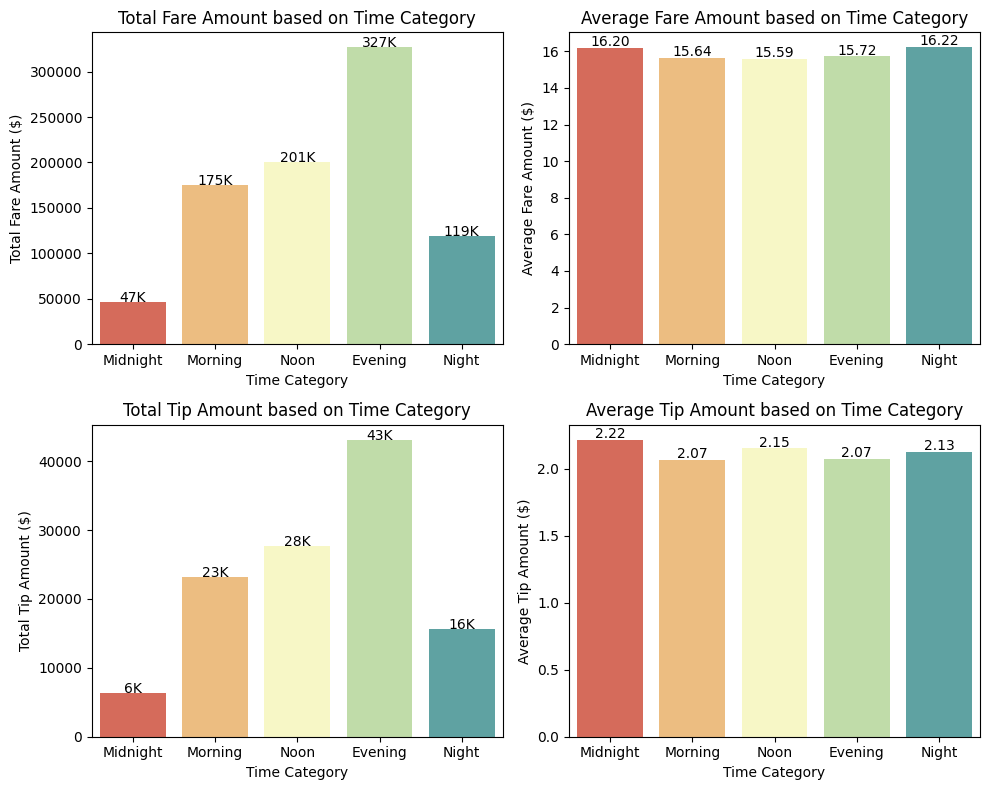

In [532]:
plt.figure(figsize = (10, 8))

# =================

# Total Fare
plt.subplot(2, 2, 1)

bars = sns.barplot(data = fare_time, y = 'total_fare_amount', x = 'time_category', palette = 'Spectral')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.0f}K".format(fare_time['total_fare_amount'].iloc[idx] / 1000)
    plt.text(x_value, y_value, label, ha = 'center')

plt.title('Total Fare Amount based on Time Category')
plt.xlabel('Time Category')
plt.ylabel('Total Fare Amount ($)')

# =================

# Average Fare
plt.subplot(2, 2, 2)

bars = sns.barplot(data = fare_time, y = 'avg_fare_amount', x = 'time_category', palette = 'Spectral')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.2f}".format(fare_time['avg_fare_amount'].iloc[idx])
    plt.text(x_value, y_value + 0.1, label, ha = 'center')

plt.title('Average Fare Amount based on Time Category')
plt.xlabel('Time Category')
plt.ylabel('Average Fare Amount ($)')

# =================

# Total Tip
plt.subplot(2, 2, 3)

bars = sns.barplot(data = fare_time, y = 'total_tip', x = 'time_category', palette = 'Spectral')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.0f}K".format(fare_time['total_tip'].iloc[idx] / 1000)
    plt.text(x_value, y_value, label, ha = 'center')

plt.title('Total Tip Amount based on Time Category')
plt.xlabel('Time Category')
plt.ylabel('Total Tip Amount ($)')

# =================

# Average Tip
plt.subplot(2, 2, 4)

bars = sns.barplot(data = fare_time, y = 'avg_tip', x = 'time_category', palette = 'Spectral')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.2f}".format(fare_time['avg_tip'].iloc[idx])
    plt.text(x_value, y_value + 0.01, label, ha = 'center')

plt.title('Average Tip Amount based on Time Category')
plt.xlabel('Time Category')
plt.ylabel('Average Tip Amount ($)')

# =================

plt.tight_layout()
plt.show()

Insights:
- Total tarif paling tinggi terjadi pada sore hari (pukul 15.00 - 20.00) dan paling rendah terjadi pada dini hari (pukul 00.00 - 05.00)
- Sedangkan pada malam hari (pukul 20.00 - 00.00) merupakan rata-rata tarif tertinggi sebesar \$16.22.

# Conclusion and Recommendation

## Conclusions

`Trip and Time`
- Di bulan Januari, Green Taxi memiliki konsumen paling banyak pada tanggal 25, sedangkan konsumen paling sedikit terjadi pada tanggal 1.
- Konsumen menggunakan taxi paling sering pada hari Weekday, tepatnya adalah hari Selasa. Sedangkan pada hari Weekend mengalami penurunan yang signifikan.
- Pada Weekday, konsumen paling sering menggunakan taxi pada jam pulang kerja (pukul 15.00 - 18.00), sedangkan paling sedikit terjadi ketika pada pukul 00.00 - 05.00 dikarenakan pada jam-jam ini merupakan jam istirahat.
- Pada Weekend, perbedaan tidak terlalu signifikan dimana konsumen paling sering menggunakan taxi pada jam 15.00 - 16.00, sedangkan paling sedikit terjadi pada pukul 05.00 - 06.00.

`Distance and Duration`
- Green Taxi paling sering digunakan untuk perjalanan jarak sangat dekat (< 2 miles) dengan durasi yang sangat singkat (< 10 menit).

`Borough and Zone`
- Zona East Harlem yang terletak di wilayah Manhattan merupakan zona padat penduduk.

`Payment`
- Metode pembayaran yang paling sering digunakan adalah dengan menggunakan kartu kredit. Terlihat bahwa konsumen lebih menyukai pembayaran cashless.

`Trip Type`
- Lebih dari 90%, konsumen menggunakan Green Taxi dengan cara memanggil dari pinggir jalan (street-hail).

`Passenger`
- Mayoritas penggunaan Green Taxi untuk perorangan.

`Fare and Tip Amount`
- Seiring dengan bertambahnya jumlah tarif tiap jamnya, jumlah tip juga ikut meningkat.
- Tarif tertinggi terjadi pada sore hari lebih tepatnya pada pukul 15.00 - 18.00 dan paling rendah terjadi pada dini hari lebih tepatnya pada pukul 04.00 - 05.00.
- Sedangkan pada malam hari merupakan rata-rata tarif tertinggi sebesar \$16.22.

## Recommendations
- Meningkatkan jumlah taxi pada Weekday untuk memenuhi kebutuhan konsumen, terutama di hari Selasa dan pada pukul 15.00 - 18.00.
- Tidak menambah atau bahkan mengurangi jumlah taxi pada Weekend dan pada jam-jam tertentu seperti pada dini hari (pukul 00.00 - 05.00).
- Memfokuskan taxi untuk stand-by di zona East Harlem dan atau wilayah Manhattan.
- Tidak menambah atau bahkan mengurangi jumlah taxi yang berada di wilayah Staten Island.
- Menambah opsi pembayaran cashless.
- Mempertimbangkan untuk meningkatkan tarif pada waktu-waktu tertentu yang memiliki permintaan tertinggi, seperti pada sore hari atau jam pulang kerja (pukul 15.00 - 18.00).
- Memberikan promo pada waktu-waktu tertentu yang memiliki permintaan sedikit, seperti pada dini hari.
- Memberikan promo untuk perjalanan jarak jauh (diatas 10 miles).